In [2]:
import os
import sys
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
from scipy.signal import welch, firwin, filtfilt, hilbert
from time import gmtime
from statsmodels.tsa.api import SimpleExpSmoothing

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0, '/Users/wassilyminkow/Scripts/Python3/')

from Neuroinformatics.torpor_project.data import *
from Neuroinformatics.math.pandas.statistics import *
from Neuroinformatics.data.pandas.time_series import TimeSeries
from Neuroinformatics.math.curves import *
from Neuroinformatics.math.regression import *

In [4]:
pylab.rcParams['figure.figsize'] = (22, 18)
sns.set(font_scale=2.5)

In [5]:
eeg_path = "/Users/wassilyminkow/Data/NakedMoleRat_Data/csv/"

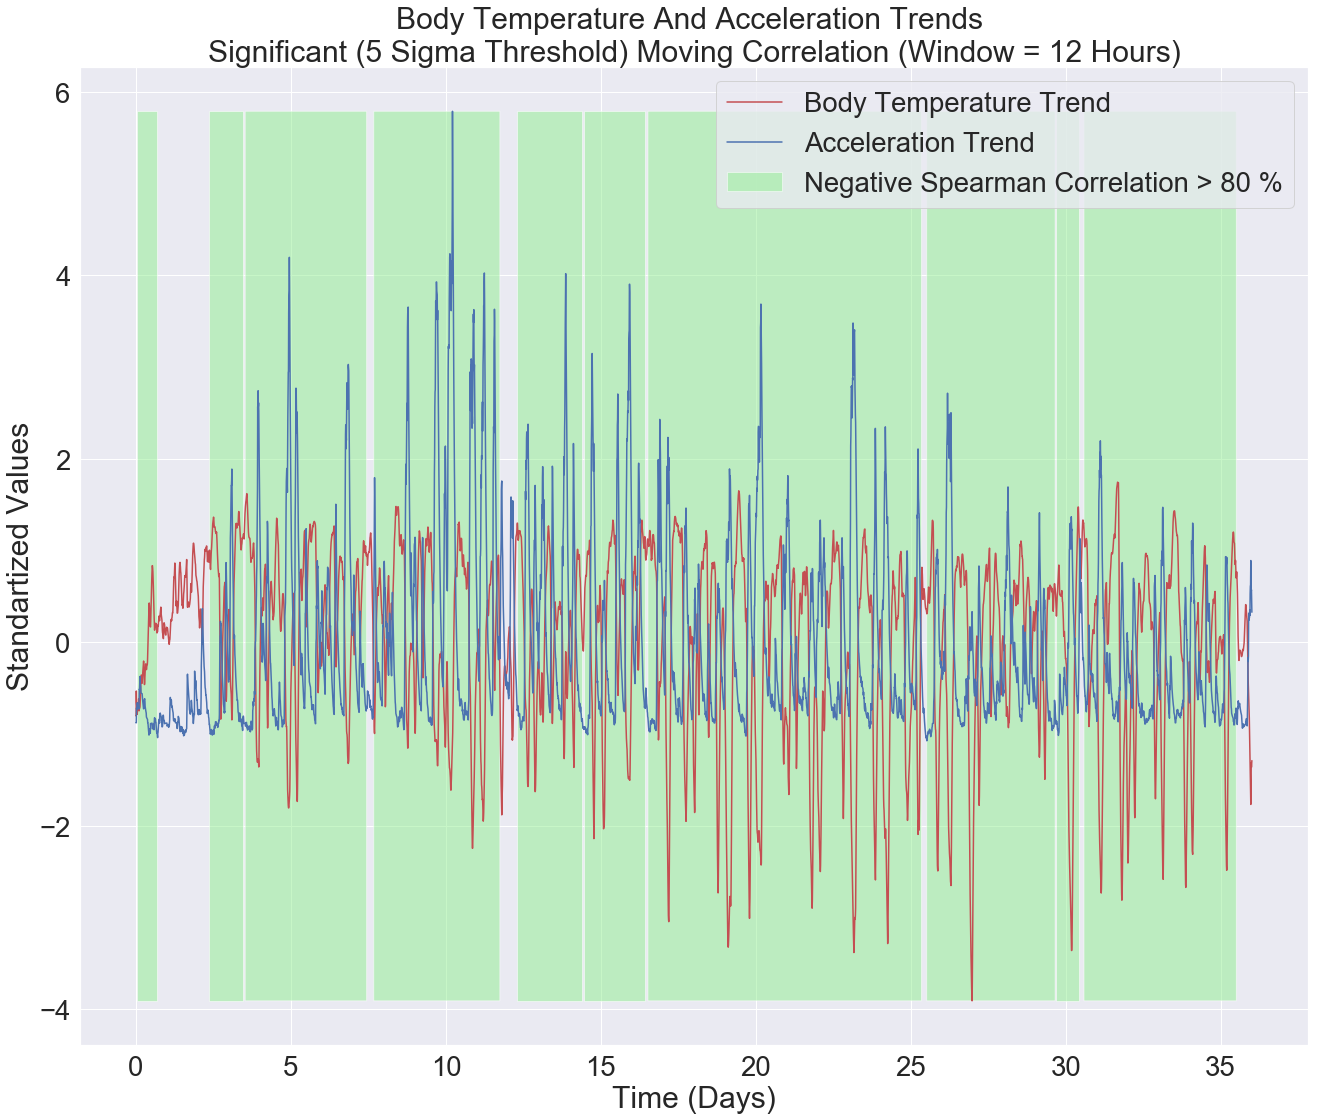

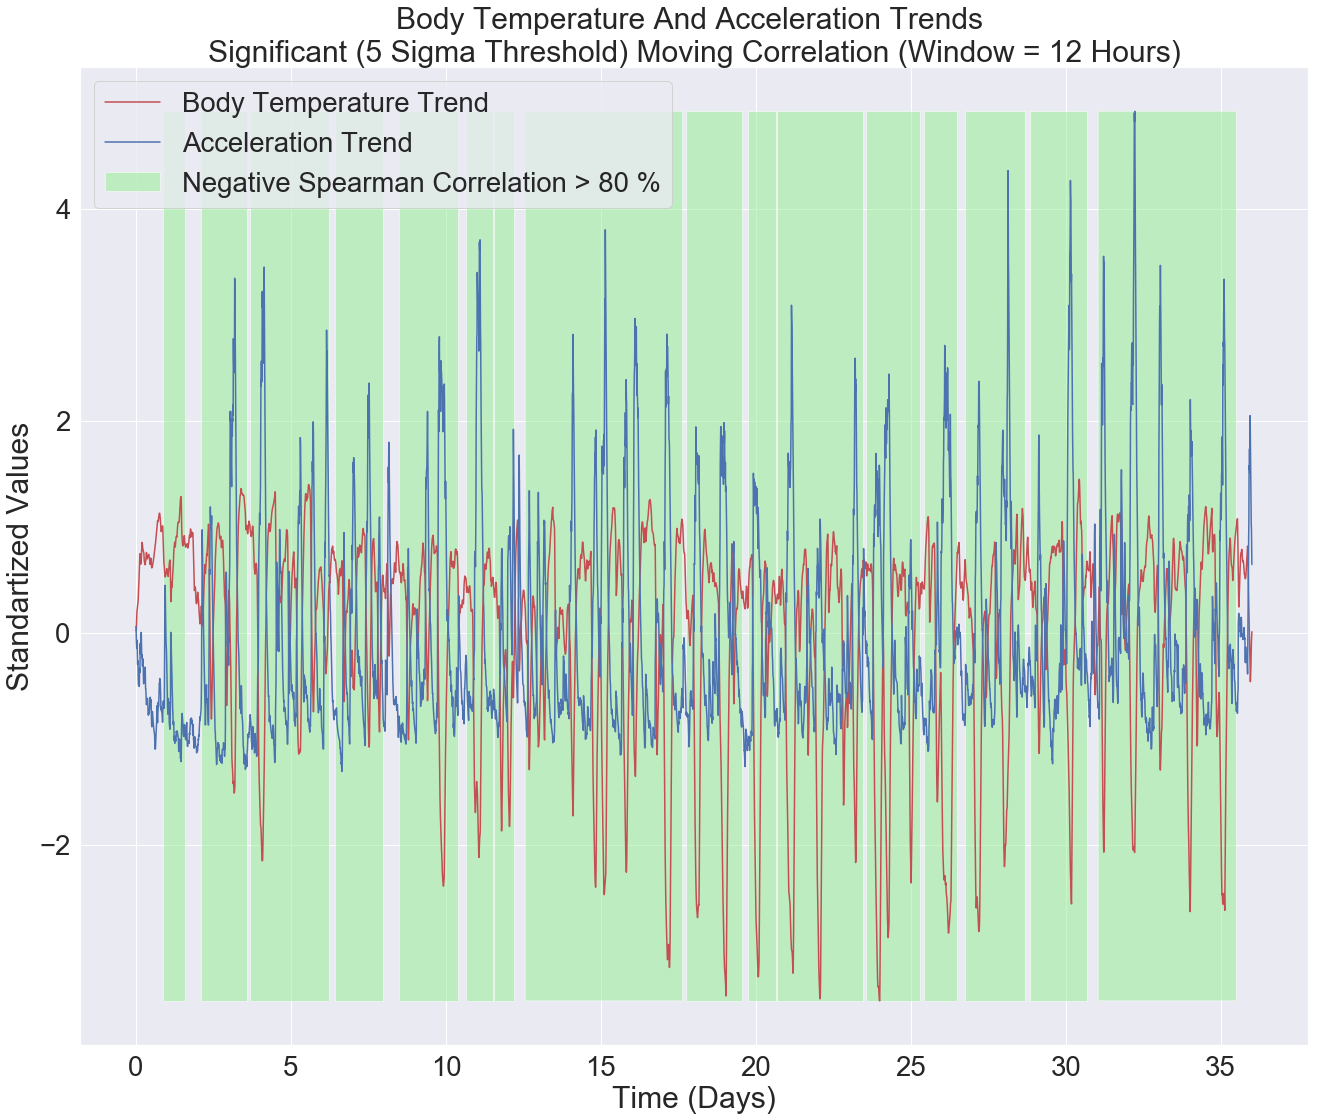

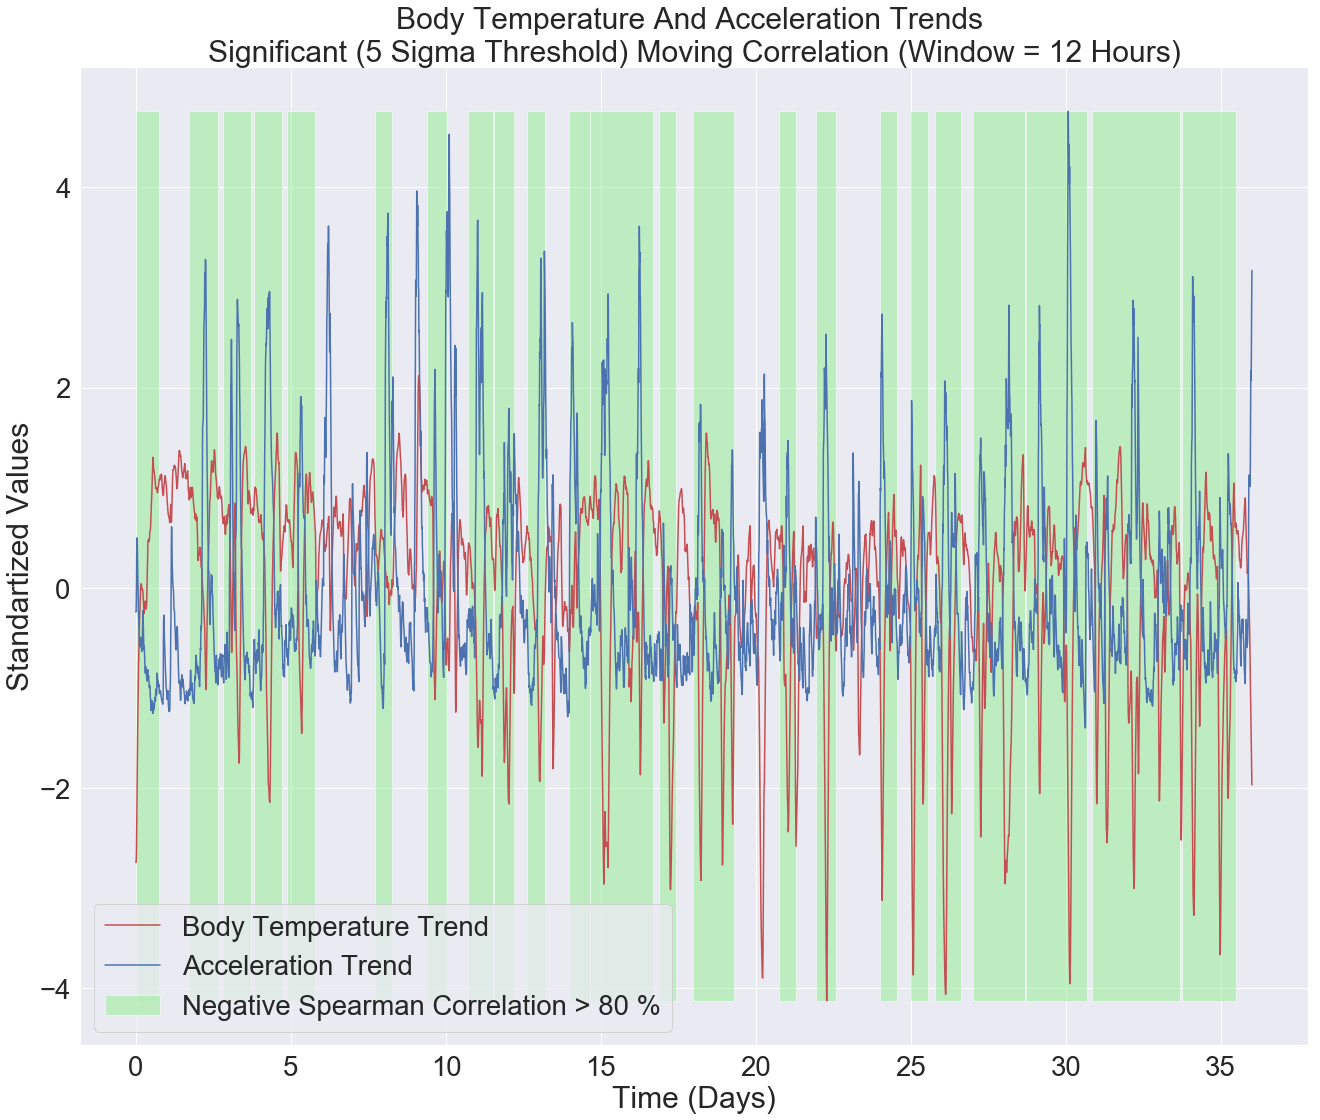

In [10]:
corr = "Negative"
sl = 0.1

for subject in os.listdir(eeg_path):
    
    data = pd.read_csv(eeg_path + subject)

    acceleration = SimpleExpSmoothing(data["dG"]).fit(smoothing_level=sl, optimized=False).fittedvalues
    temperature = SimpleExpSmoothing(data["T"]).fit(smoothing_level=sl, optimized=False).fittedvalues    
    time_array = np.asanyarray(data.index[:temperature.shape[0]])/6/24
    z = moving_correlation(time_array, temperature, acceleration, gap=6*12, correlation=corr.lower())
    
    top = np.max([(standardize(temperature)).max(), (standardize(acceleration)).max()])
    bottom = np.min([(standardize(temperature)).min(), (standardize(acceleration)).min()])
    skip_start = 0

    tech = np.ones(z[0][1][:].shape[0])
    name = subject.split(".")[0]

    subplot(1,1,1)
#     fill_between(z[2][1][:], tech*top, tech*bottom, alpha=0.5, facecolor="mistyrose", label = "60% > Absolute Spearman Correlation> 40%")
#     fill_between(z[1][1][:], tech*top, tech*bottom, alpha=0.5, facecolor="lemonchiffon", label = "80% > Absolute Spearman Correlation > 60%")
    fill_between(z[0][1][:], tech*top, tech*bottom, alpha=0.5, facecolor="lightgreen", label = "Negative Spearman Correlation > 80 %")
    plot(time_array, standardize(temperature), "r", label="Body Temperature Trend")
    plot(time_array, standardize(acceleration), "b", label="Acceleration Trend")
    title("Body Temperature And Acceleration Trends \nSignificant (5 Sigma Threshold) Moving Correlation (Window = 12 Hours)")
    ylabel("Standartized Values")
    xlabel("Time (Days)")
    legend(loc="best")
    show()